#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [69]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/نسخة من Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [70]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [73]:
df1=df.copy()

#1.Basic Data Exploration

In [74]:
num_rows, num_cols = df1.shape

In [75]:
num_rows

148654

In [76]:
num_cols

13

In [78]:
df1.dtypes



Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [81]:
missing_values=df1.isnull().sum()

In [82]:
missing_values

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [85]:
df1.isna()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,False,False,False,False,False,False,True,False,False,False,True,False,True
1,False,False,False,False,False,False,True,False,False,False,True,False,True
2,False,False,False,False,False,False,True,False,False,False,True,False,True
3,False,False,False,False,False,False,True,False,False,False,True,False,True
4,False,False,False,False,False,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,False,False,False,False,False,False,False,False,False,False,True,False,True
148650,False,False,False,True,True,True,True,False,False,False,True,False,True
148651,False,False,False,True,True,True,True,False,False,False,True,False,True
148652,False,False,False,True,True,True,True,False,False,False,True,False,True


#2.Descriptive Statistics

In [86]:
salary_stats = df1['TotalPay'].describe()

In [87]:
salary_stats

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

In [89]:
salary_mode = df1['TotalPay'].mode()

In [90]:
salary_mode

0    0.0
Name: TotalPay, dtype: float64

In [91]:
salary_range = df1['TotalPay'].max() - df1['TotalPay'].min()


In [92]:
salary_range

568213.56

In [93]:
salary_std = df1['TotalPay'].std()


In [94]:
salary_std

50517.00527394987

#3.Data Cleaning

**What i do?**


1-I notice that there is a column all values is null and also this column called **notes** so i think i can't handle it because notes for each employee depends on his/her performance so i drop it from data and same thing with **status**

2-for **basepay** first i check for the jop title and i found that there is a non_provided joptitle so i thing i can't make a guess for basebay for non provided but other i make a guess by replacing nan values with the mean and same thing with **benfits**


In [95]:
selected_columns = ['JobTitle'
,'BasePay']
print(df1[selected_columns])

                                              JobTitle    BasePay
0       GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  167411.18
1                      CAPTAIN III (POLICE DEPARTMENT)  155966.02
2                      CAPTAIN III (POLICE DEPARTMENT)  212739.13
3                 WIRE ROPE CABLE MAINTENANCE MECHANIC   77916.00
4         DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)  134401.60
...                                                ...        ...
148649                                       Custodian       0.00
148650                                    Not provided        NaN
148651                                    Not provided        NaN
148652                                    Not provided        NaN
148653                      Counselor, Log Cabin Ranch       0.00

[148654 rows x 2 columns]


In [96]:
df['Result'] = np.where(df['BasePay'].isna(), df['JobTitle'], np.nan)
print(df['Result'])

0                  NaN
1                  NaN
2                  NaN
3                  NaN
4                  NaN
              ...     
148649             NaN
148650    Not provided
148651    Not provided
148652    Not provided
148653             NaN
Name: Result, Length: 148654, dtype: object


In [97]:
result_df = df.loc[df['BasePay'].isna(), ['BasePay', 'JobTitle']]
print(result_df)

        BasePay                   JobTitle
81391       NaN             Deputy Chief 3
84506       NaN  Licensed Vocational Nurse
84960       NaN        Park Patrol Officer
90525       NaN           Police Officer 3
90786       NaN             Deputy Sheriff
...         ...                        ...
110530      NaN           Police Officer 3
148646      NaN               Not provided
148650      NaN               Not provided
148651      NaN               Not provided
148652      NaN               Not provided

[609 rows x 2 columns]


In [98]:
# Drop rows where 'BasePay' is NaN and 'JobTitle' is 'Not provided'
df = df[(~df['BasePay'].isna()) | (df['JobTitle'] != 'Not provided')]


In [99]:
not_provided_count = (df['JobTitle'] == 'Not provided').sum()

print("Count of 'Not provided' in JobTitle:", not_provided_count)

Count of 'Not provided' in JobTitle: 0


In [100]:
# Replace NaN values in 'BasePay' with the mean of non-NaN values
mean_basepay = df['BasePay'].mean()
df['BasePay'].fillna(mean_basepay, inplace=True)

In [101]:
null_count = df['BasePay'].isna().sum()

print("Count of null values in 'BasePay':", null_count)

Count of null values in 'BasePay': 0


In [102]:
df.isnull().sum()


Id                       0
EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148650
Agency                   0
Status              148650
Result              148045
dtype: int64

In [103]:
 df['Notes']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
148645   NaN
148647   NaN
148648   NaN
148649   NaN
148653   NaN
Name: Notes, Length: 148650, dtype: float64

In [27]:
null_count = df['Notes'].isna().sum()
null_count


148650

In [28]:
num_rows

148654

In [29]:
df = df.drop(columns=['Notes'])


In [30]:
df['Benefits']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
148645    0.0
148647    0.0
148648    0.0
148649    0.0
148653    0.0
Name: Benefits, Length: 148650, dtype: float64

In [31]:
df = df.drop(columns=['Status'])


In [32]:
 n=df['Benefits'].mode()

In [33]:
salary_mode = df['Benefits'].mode()

In [34]:
n

0    0.0
Name: Benefits, dtype: float64

In [35]:
salary_mode

0    0.0
Name: Benefits, dtype: float64

In [36]:
# Replace NaN values in 'BasePay' with the mean of non-NaN values
mean_Benefits = df['Benefits'].mean()
df['Benefits'].fillna(mean_basepay, inplace=True)

In [37]:
df.isnull().sum()


Id                       0
EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Agency                   0
Result              148045
dtype: int64

#Basic Data Visualization

In [38]:
import matplotlib.pyplot as plt


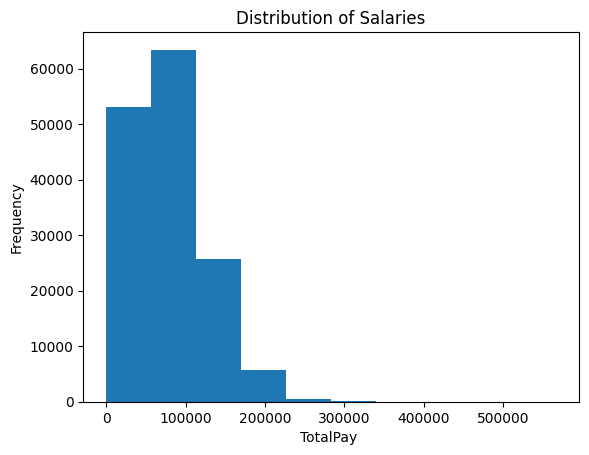

In [39]:
plt.hist(df['TotalPay'], bins=10)
plt.xlabel('TotalPay ')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')
plt.show()

In [40]:
unique_count = df['JobTitle'].nunique()
print(f"Unique values in '{'JobTitle'}': {unique_count}")

Unique values in 'JobTitle': 2158


In [41]:
df['JobTitle']

0         GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1                        CAPTAIN III (POLICE DEPARTMENT)
2                        CAPTAIN III (POLICE DEPARTMENT)
3                   WIRE ROPE CABLE MAINTENANCE MECHANIC
4           DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)
                               ...                      
148645                         Human Services Technician
148647                       Communications Dispatcher 2
148648                                         Custodian
148649                                         Custodian
148653                        Counselor, Log Cabin Ranch
Name: JobTitle, Length: 148650, dtype: object

**To extract name of departments**

In [42]:

# Extract department information
df['Department'] = df['JobTitle'].str.extract(r'\(([^)]+)\)', expand=False)

# Fill NaN values with the original job title
df['Department'].fillna('non_spesific_department', inplace=True)

# Display the result
print(df[['JobTitle', 'Department']])

                                              JobTitle  \
0       GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1                      CAPTAIN III (POLICE DEPARTMENT)   
2                      CAPTAIN III (POLICE DEPARTMENT)   
3                 WIRE ROPE CABLE MAINTENANCE MECHANIC   
4         DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   
...                                                ...   
148645                       Human Services Technician   
148647                     Communications Dispatcher 2   
148648                                       Custodian   
148649                                       Custodian   
148653                      Counselor, Log Cabin Ranch   

                     Department  
0       non_spesific_department  
1             POLICE DEPARTMENT  
2             POLICE DEPARTMENT  
3       non_spesific_department  
4               FIRE DEPARTMENT  
...                         ...  
148645  non_spesific_department  
148647  non_spesific_department

In [43]:
department_mapping = {
    'non_spesific_department': 'A',
    'POLICE DEPARTMENT': 'B',
    'FIRE DEPARTMENT': 'C',
    'CIVIL & CRIMINAL': 'D',
    'CIVIL/CRIMINAL': 'E',
    'MFCC': 'F',
    'SEASONAL': 'G',
    'Fire Dept': 'H',
    'Cvl&Crmnl': 'I',
    'Civil & Criminal': 'J',
    'SFERS': 'K',
    'Police Department': 'L',
    'Civil/Criminal': 'M',
    'Seasonal': 'N',
    'Fire Department': 'O',
}

# Replace values in the 'Department' column with letters
df['Department'] = df['Department'].map(department_mapping)


In [44]:
df['Department']

0         A
1         B
2         B
3         A
4         C
         ..
148645    A
148647    A
148648    A
148649    A
148653    A
Name: Department, Length: 148650, dtype: object

In [45]:
unique_departments = df['Department'].unique()
print("Unique values in 'Department':")
print(unique_departments)

Unique values in 'Department':
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O']


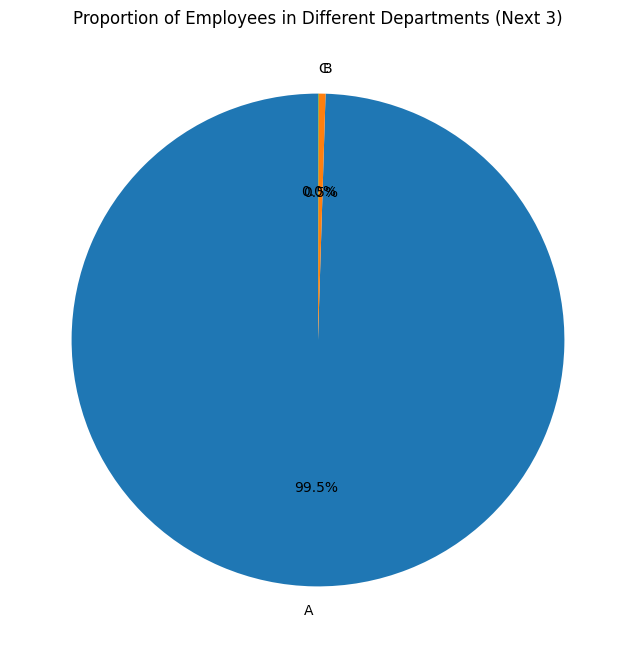

In [46]:
# Select the second set of three unique values in 'Department'
selected_departments = df['Department'].unique()[:3]

# Create a pie chart for the selected departments
plt.figure(figsize=(8, 8))
department_counts = df[df['Department'].isin(selected_departments)]['Department'].value_counts()
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Employees in Different Departments (Next 3)')
plt.show()

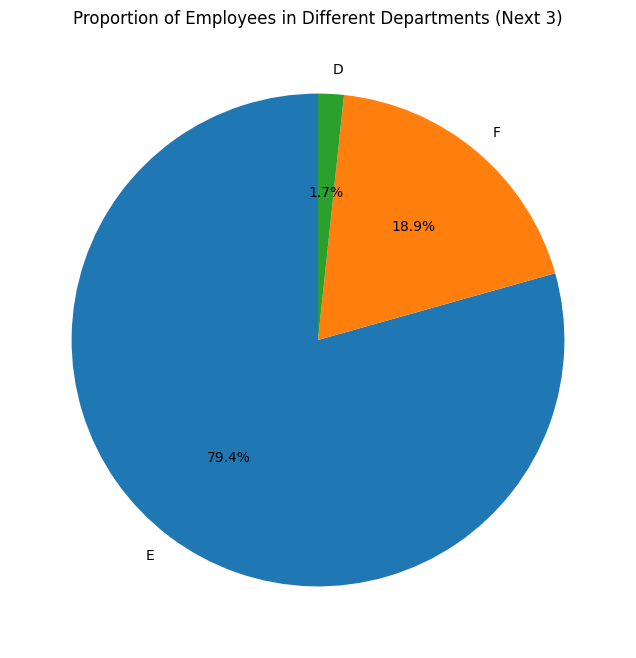

In [47]:
# Select the second set of three unique values in 'Department'
selected_departments = df['Department'].unique()[3:6]

# Create a pie chart for the selected departments
plt.figure(figsize=(8, 8))
department_counts = df[df['Department'].isin(selected_departments)]['Department'].value_counts()
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Employees in Different Departments (Next 3)')
plt.show()

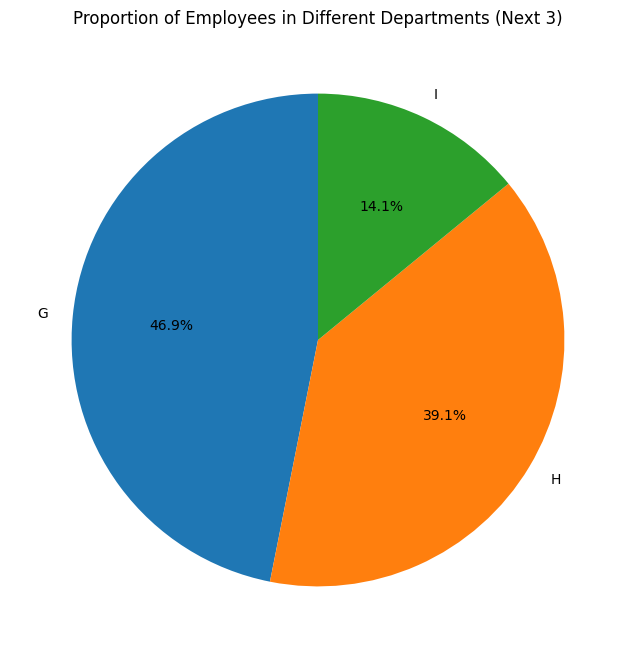

In [48]:
# Select the second set of three unique values in 'Department'
selected_departments = df['Department'].unique()[6:9]

# Create a pie chart for the selected departments
plt.figure(figsize=(8, 8))
department_counts = df[df['Department'].isin(selected_departments)]['Department'].value_counts()
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Employees in Different Departments (Next 3)')
plt.show()

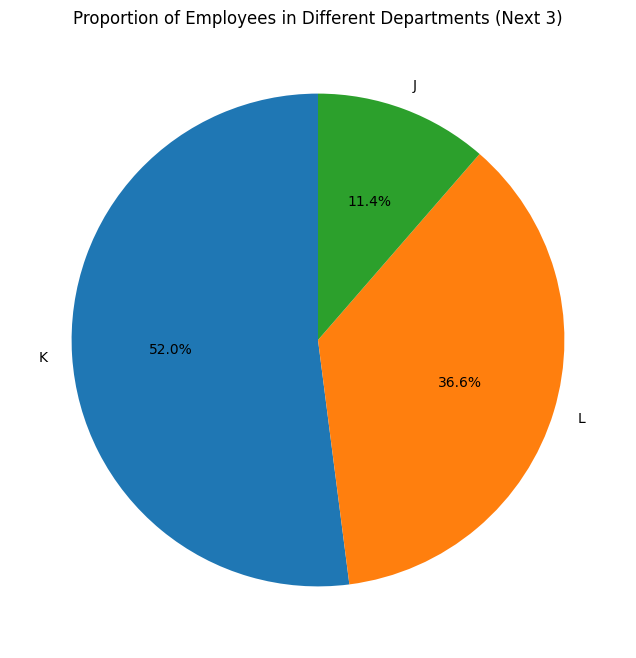

In [49]:
# Select the second set of three unique values in 'Department'
selected_departments = df['Department'].unique()[9:12]

# Create a pie chart for the selected departments
plt.figure(figsize=(8, 8))
department_counts = df[df['Department'].isin(selected_departments)]['Department'].value_counts()
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Employees in Different Departments (Next 3)')
plt.show()

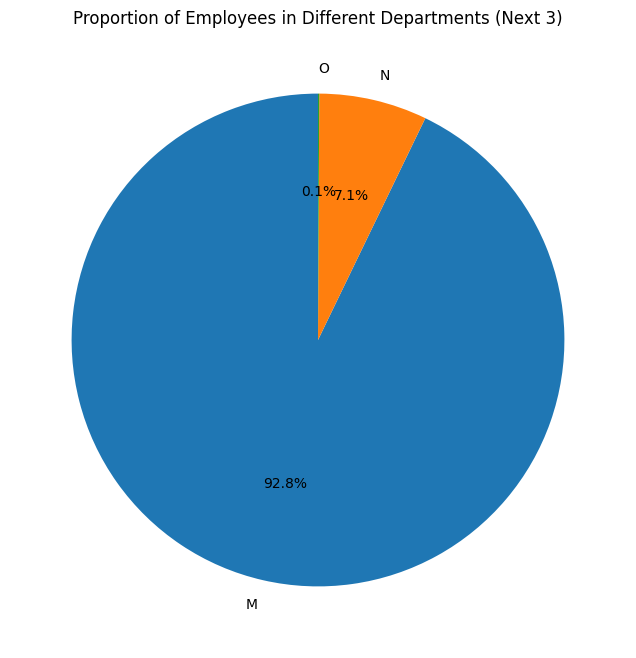

In [ ]:
# Select the second set of three unique values in 'Department'
selected_departments = df['Departmentr'].unique()[12:15]

# Create a pie chart for the selected departments
plt.figure(figsize=(8, 8))
department_counts = df[df['Departmentr'].isin(selected_departments)]['Departmentr'].value_counts()
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Employees in Different Departments (Next 3)')
plt.show()

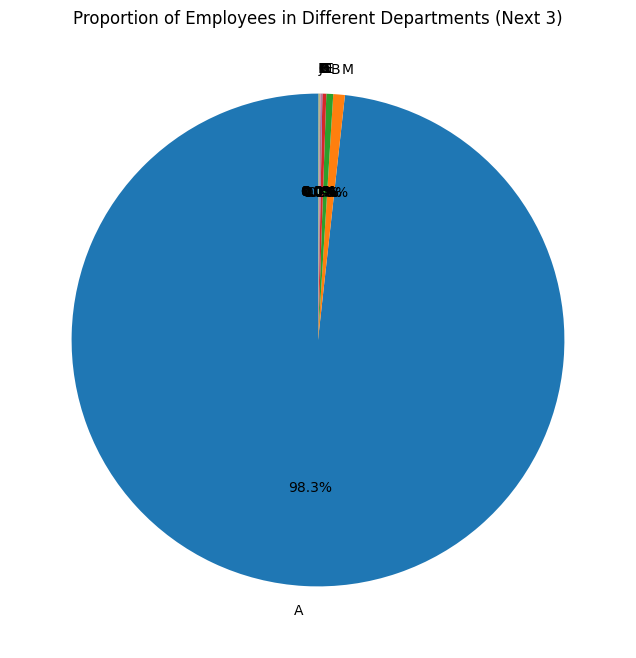

In [ ]:
# Select the second set of three unique values in 'Department'
selected_departments = df['Departmentr'].unique()[:]

# Create a pie chart for the selected departments
plt.figure(figsize=(8, 8))
department_counts = df[df['Departmentr'].isin(selected_departments)]['Departmentr'].value_counts()
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Employees in Different Departments (Next 3)')
plt.show()

#Grouped Analysis

In [57]:
# Grouped Analysis
grouped_data = df.groupby('Department')  # Grouping by the 'Department' column
grouped_stats = grouped_data['TotalPay'].mean()  # Calculate average salary for each group

# Convert grouped data to DataFrame
grouped_df = grouped_stats.reset_index()

# Print the grouped DataFrame
print(grouped_df)

   Department       TotalPay
0           A   73675.415698
1           B  158810.073568
2           C  221158.444615
3           D  181415.143750
4           E  128056.733820
5           F   67517.330222
6           G    7488.975667
7           H  276063.426400
8           I  215085.310000
9           J  203727.389286
10          K   87697.342344
11          L  152696.334444
12          M  137961.430036
13          N   10043.225814
14          O   35332.780000


#Simple Correlation Analysis

In [61]:
#  column for which i  calculate its correlation
column_of_interest = 'TotalPay'

# Calculate correlation with other columns
correlations = df.corr()[column_of_interest]

# Print the correlations
print(correlations)

Id                 -0.211424
BasePay             0.950542
OvertimePay         0.504859
OtherPay            0.470496
Benefits            0.444855
TotalPay            1.000000
TotalPayBenefits    0.977312
Year                0.032145
Name: TotalPay, dtype: float64


<ipython-input-61-f2530957a551>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()[column_of_interest]


**Heres the visualization for correlation between the salary(totalpay) and numerical columns**

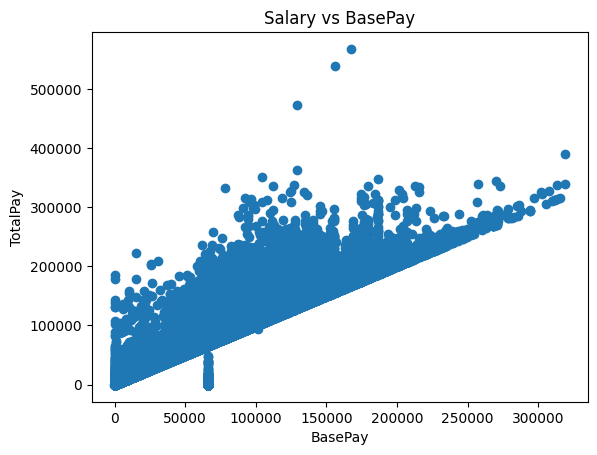

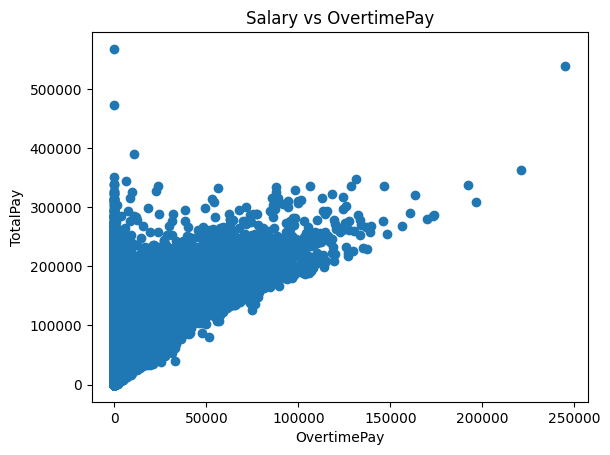

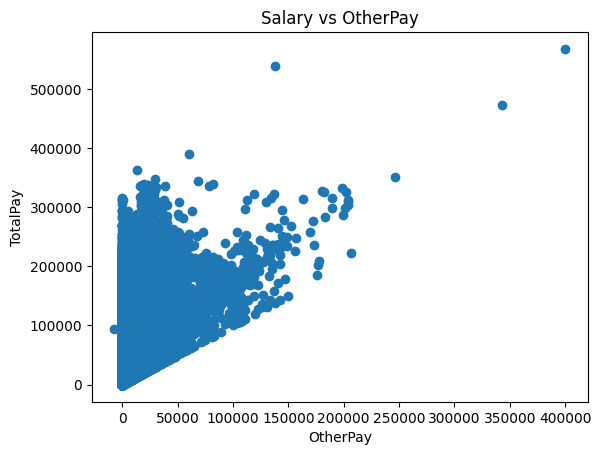

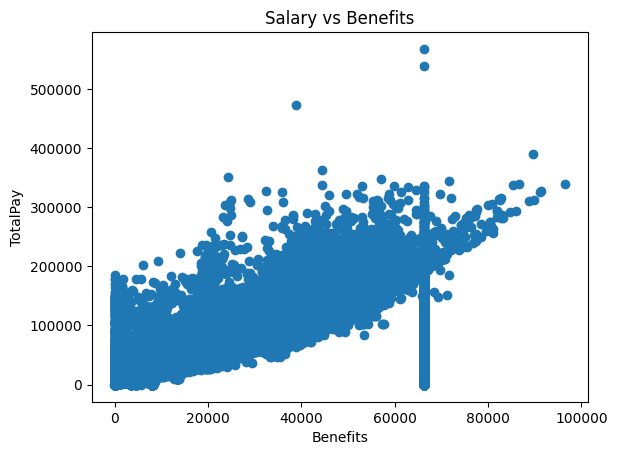

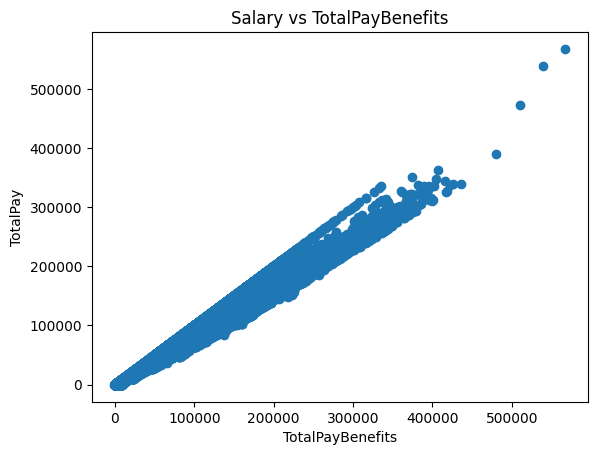

In [58]:
# numerical columns for plotting
numerical_columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPayBenefits']

#  scatter plots
for column in numerical_columns:
    plt.scatter(df[column], df['TotalPay'])
    plt.xlabel(column)
    plt.ylabel('TotalPay')
    plt.title(f'Salary vs {column}')
    plt.show()

**heres the correlations and statistics for all columns and relations between them**

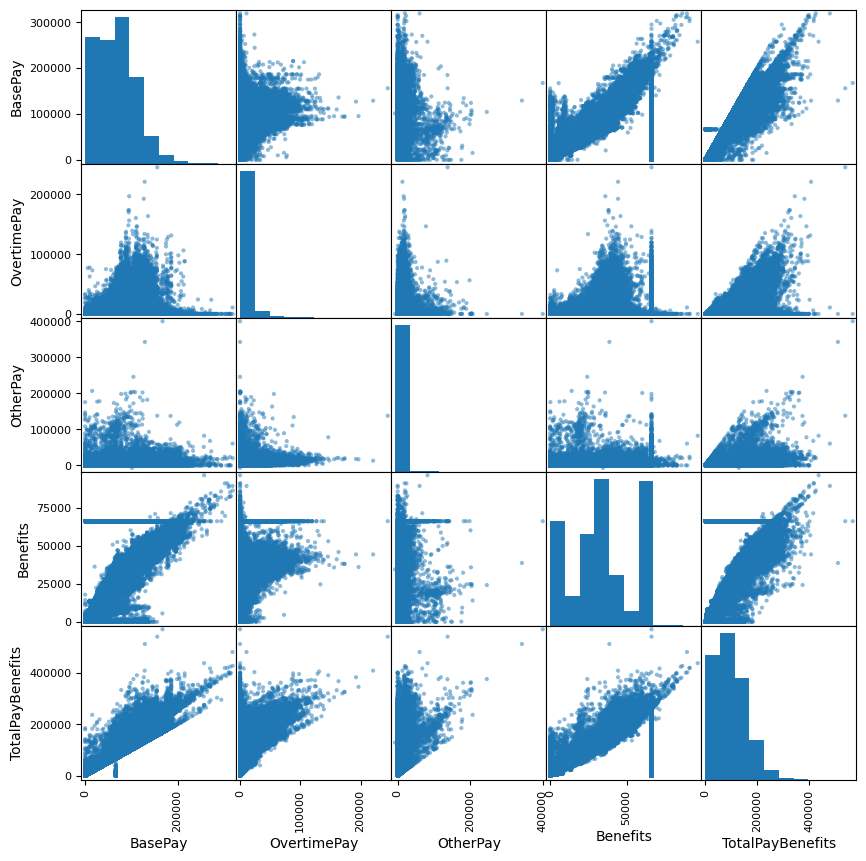

In [59]:
# scatter matrix
pd.plotting.scatter_matrix(df[numerical_columns], figsize=(10, 10))
plt.show()

# Good Luck!

#heres the summary of insights that i deduce them

In [84]:
# Summary of Insights
summary_report = """
Summary Report:
- Number of rows: {}
- Number of columns: {}
- Data types: {}
- Missing values: {}
- Salary statistics: {}
- Salary range: {}
- Salary standard deviation: {}
- Grouped statistics by department: {}
- Correlation between years of experience and salary: {}
""".format(num_rows, num_cols, n, missing_values, salary_stats, salary_range, salary_std, grouped_stats, correlations)

print(summary_report)


Summary Report:
- Number of rows: 148654
- Number of columns: 13
- Data types: Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Agency               object
Result               object
Department           object
dtype: object
- Missing values: Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64
- Salary statistics: count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
7